# Analisis de sentimiento

## Introducción

1. **Módulo TextBlob:** Los investigadores lingüísticos han etiquetado el sentimiento de las palabras en función de su experiencia en el dominio. El sentimiento de las palabras puede variar en función de dónde se encuentre en una oración. El módulo TextBlob nos permite aprovechar estas etiquetas.
2. **Etiquetas de Sentimiento:** Cada palabra en un corpus está etiquetada en términos de polaridad y subjetividad (también hay más etiquetas, pero las vamos a ignorar por ahora). El sentimiento de un corpus es el promedio de estos.
   * **Polaridad**: Qué tan positiva o negativa es una palabra. -1 es muy negativo. +1 es muy positivo.
   * **Subjetividad**: Cuán subjetiva u obstinada es una palabra. 0 es un hecho. +1 es en gran medida una opinión.

Echemos un vistazo al sentimiento de las diversas transcripciones, tanto en general como a lo largo de la rutina de la comedia.

## Rutina de Sentimiento

In [25]:
# Comenzaremos leyendo en el corpus, que conserva el orden de las palabras.
import pandas as pd

data = pd.read_pickle('pickle/corpus.pkl')
data

,transcript,full_name
anthony,"Thank you. Thank you. Thank you, San Francisco...",Ali Wong
art,Bo What? Old MacDonald had a farm E I E I O An...,Anthony Jeselnik
bobi,"Ladies and gentlemen, please welcome to the st...",Bill Burr
ga,[Car horn honks] [Audience cheering] [Announce...,Bo Burnham
joe,[rock music playing] [audience cheering] [anno...,Dave Chappelle
lleyni,This is Dave. He tells dirty jokes for a livin...,Hasan Minhaj
luz,Hello. Hello! How you doing? Great. Thank you....,Jim Jefferies
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Joe Rogan
paulita,Intro\nFade the music out. Let’s roll. Hold th...,John Mulaney
pepito,"Armed with boyish charm and a sharp wit, the f...",Louis C.K.


In [26]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
!pip install textblob

In [27]:
# Cree funciones lambda rápidas para encontrar la polaridad y la subjetividad de cada rutina
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
anthony,"Thank you. Thank you. Thank you, San Francisco...",Ali Wong,0.063377,0.559790
art,Bo What? Old MacDonald had a farm E I E I O An...,Anthony Jeselnik,0.079319,0.540374
bobi,"Ladies and gentlemen, please welcome to the st...",Bill Burr,0.074543,0.485406
ga,[Car horn honks] [Audience cheering] [Announce...,Bo Burnham,0.048405,0.524486
joe,[rock music playing] [audience cheering] [anno...,Dave Chappelle,0.043783,0.547919
lleyni,This is Dave. He tells dirty jokes for a livin...,Hasan Minhaj,0.002237,0.515530
luz,Hello. Hello! How you doing? Great. Thank you....,Jim Jefferies,0.069815,0.498882
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Joe Rogan,0.096368,0.519716
paulita,Intro\nFade the music out. Let’s roll. Hold th...,John Mulaney,0.061908,0.517529
pepito,"Armed with boyish charm and a sharp wit, the f...",Louis C.K.,0.086227,0.485797


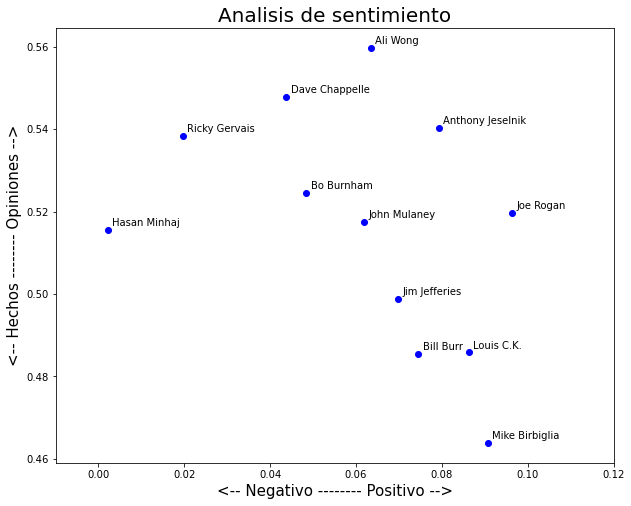

In [38]:
# Grafiquemos los resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Analisis de sentimiento', fontsize=20)
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15)
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15)

plt.show()

## Rutina de Sentimiento a lo largo del tiempo

En lugar de mirar el sentimiento general, veamos si hay algo interesante sobre el sentimiento a lo largo del tiempo a lo largo de cada rutina.

In [29]:
# Divide cada rutina en 10 partes
import numpy as np
import math

def split_text(text, n=10):
    '''Toma una cadena de texto y la divide en n partes iguales, con un valor predeterminado de 10 partes iguales.'''

    # Calcule la longitud del texto, el tamaño de cada fragmento de texto y los puntos de inicio de cada fragmento de texto
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Extraiga fragmentos de texto del mismo tamaño y póngalos en una lista
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [30]:
# Echemos un vistazo a nuestros datos de nuevo
data

,transcript,full_name,polarity,subjectivity
anthony,"Thank you. Thank you. Thank you, San Francisco...",Ali Wong,0.063377,0.559790
art,Bo What? Old MacDonald had a farm E I E I O An...,Anthony Jeselnik,0.079319,0.540374
bobi,"Ladies and gentlemen, please welcome to the st...",Bill Burr,0.074543,0.485406
ga,[Car horn honks] [Audience cheering] [Announce...,Bo Burnham,0.048405,0.524486
joe,[rock music playing] [audience cheering] [anno...,Dave Chappelle,0.043783,0.547919
lleyni,This is Dave. He tells dirty jokes for a livin...,Hasan Minhaj,0.002237,0.515530
luz,Hello. Hello! How you doing? Great. Thank you....,Jim Jefferies,0.069815,0.498882
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Joe Rogan,0.096368,0.519716
paulita,Intro\nFade the music out. Let’s roll. Hold th...,John Mulaney,0.061908,0.517529
pepito,"Armed with boyish charm and a sharp wit, the f...",Louis C.K.,0.086227,0.485797


In [31]:
# Vamos a crear una lista para contener todas las piezas de texto
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. 

In [32]:
# La lista tiene 10 elementos, uno para cada transcripción.
len(list_pieces)

12

In [33]:
# Cada transcripción se ha dividido en 10 piezas de texto.
len(list_pieces[0])

10

In [34]:
# Calcular la polaridad de cada fragmento de texto

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.14813544856227787,
  -0.09501356852103121,
  -0.018946837994457046,
  0.03688446969696969,
  0.12692862692862691,
  0.1366996336996337,
  0.08488636363636365,
  0.004733198243836537,
  0.024391379230088904,
  0.16100133104443445],
 [0.1738758288125377,
  -0.05915352957589287,
  -0.01911550065231571,
  0.040240860990860994,
  0.05460471222766305,
  -0.03846844293272864,
  0.03523965141612201,
  0.20398347760564992,
  0.2006024821952241,
  0.18819047619047616],
 [0.10982341269841271,
  0.07011794532627867,
  0.0676048790179225,
  0.1006832611832612,
  -0.042106537530266344,
  0.15212721992995432,
  0.03777319719753929,
  0.1122005091344714,
  0.01344817729351628,
  0.1130333951762523],
 [0.0900033676665111,
  0.12748140269691993,
  0.09837600273084146,
  -0.019266084393037553,
  -0.02662272962544703,
  0.033787698412698415,
  0.12647046454451347,
  0.06723958333333331,
  -0.04831254724111867,
  0.02490254274345183],
 [0.03418882356382356,
  0.011757618890771064,
  0.01010504201680671

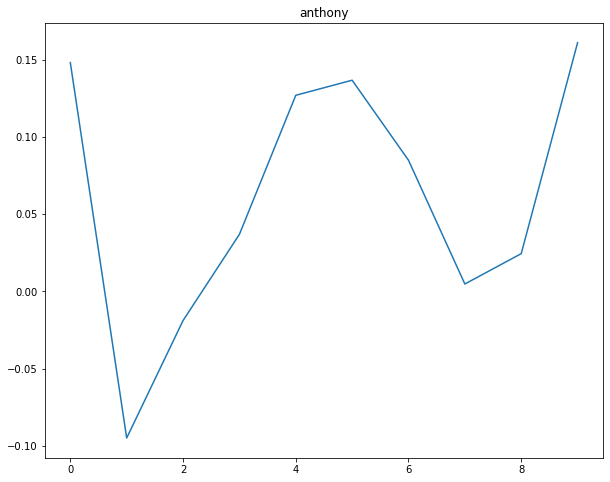

In [35]:
# Mostrar la trama de un comediante
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

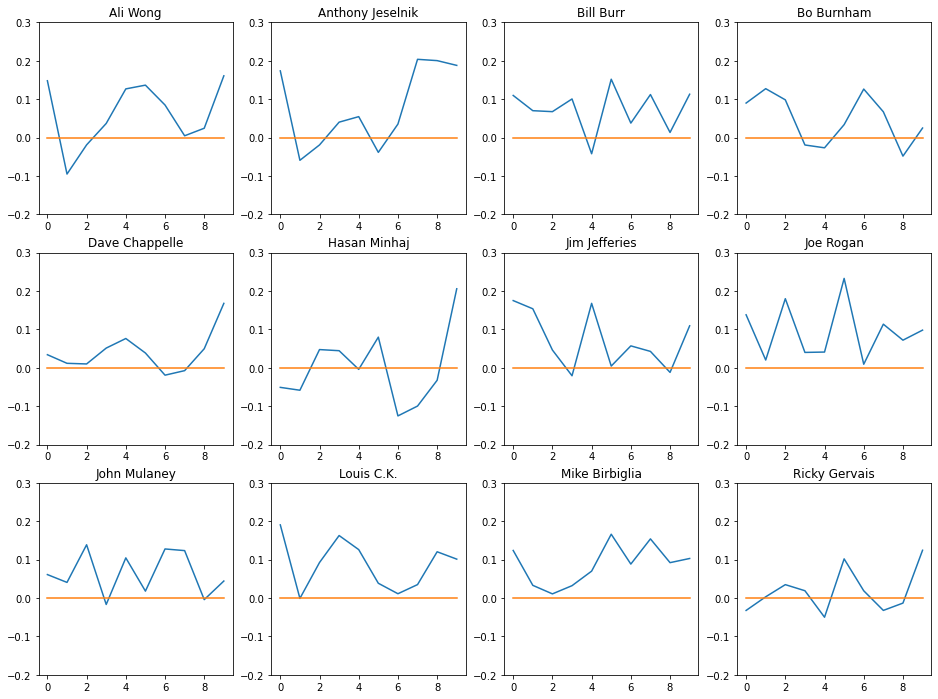

In [36]:
# Mostrar la trama para todos los comediantes
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()

Ali Wong se mantiene generalmente positiva a lo largo de su rutina. Comediantes similares son Louis C.K. y Mike Birbiglia.

Sin embargo personas como Bo Burnham se vuelven más felices a medida que pasa el tiempo, todo lo contrario a Dave Chappelle, que tiene algunos momentos bastante bajos en su rutina.